In [12]:
#importing librries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#loading data
path = r"C:\Users\FC\Downloads\Titanic-Dataset.csv"
df = pd.read_csv(path)

In [14]:
print(df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']])

      Age     Fare  Pclass  SibSp  Parch
0    22.0   7.2500       3      1      0
1    38.0  71.2833       1      1      0
2    26.0   7.9250       3      0      0
3    35.0  53.1000       1      1      0
4    35.0   8.0500       3      0      0
..    ...      ...     ...    ...    ...
886  27.0  13.0000       2      0      0
887  19.0  30.0000       1      0      0
888   NaN  23.4500       3      1      2
889  26.0  30.0000       1      0      0
890  32.0   7.7500       3      0      0

[891 rows x 5 columns]


In [15]:
#selecting features
features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
df_clean = df[features + ['Survived']].dropna()

In [16]:
#seperating features and target
X = df_clean[features]
y = df_clean['Survived']

In [17]:
#scaling data and applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

In [18]:
#creating df for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Survived'] = y.reset_index(drop=True)

Explained variance ratio:
PC1: 34.83%
PC2: 32.27%


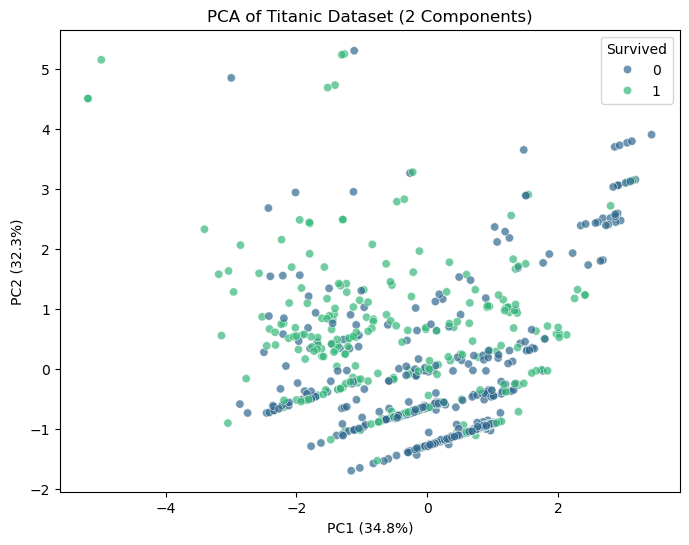

In [19]:
#plotting data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2',  hue='Survived',  palette='viridis', data=pca_df, alpha=0.7)
plt.title('PCA of Titanic Dataset (2 Components)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
print("Explained variance ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
plt.legend(title='Survived')
plt.show()